In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
hs = pd.read_excel("C:/Users/vishal/Desktop/aug10/Linear Regression.xlsx",sheet_name=0 )

In [3]:
hs.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [5]:
hs.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [6]:
hs.size

108065

In [7]:
hs.shape

(21613, 5)

In [8]:
hs.count()

price          21613
sqft_living    21613
bedrooms       21613
bathrooms      21613
floors         21613
dtype: int64

In [9]:
hs.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [10]:
hs["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
hs["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
hs["floors"].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

# Visualizing the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016FC55D2E48>,
      dtype=object)

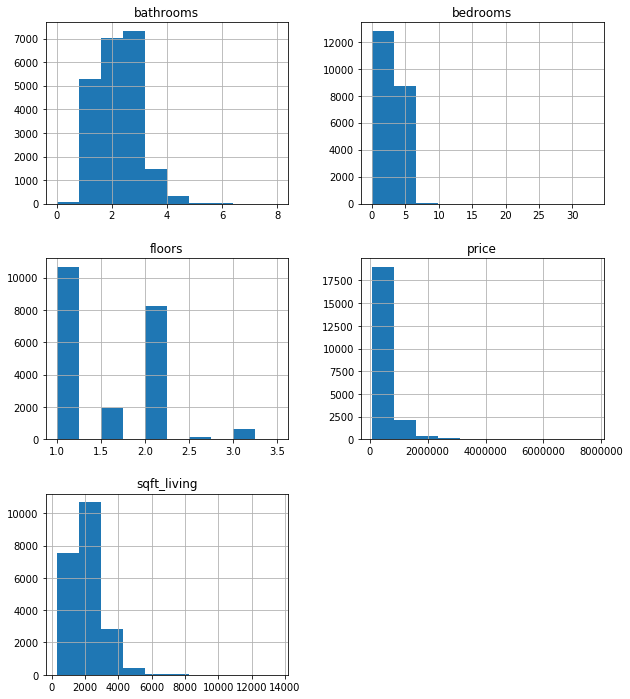

In [13]:
hs.hist(figsize=(10,12))

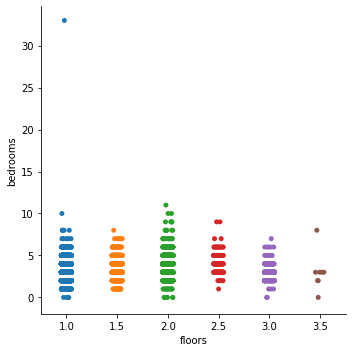

In [14]:
sb.catplot(x="floors",y="bedrooms",data=hs)

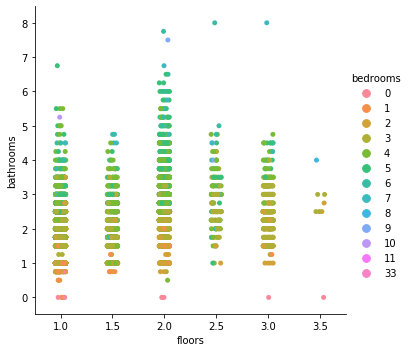

In [15]:
sb.catplot(x="floors",y="bathrooms",hue="bedrooms",data=hs)

In [16]:
hs.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0


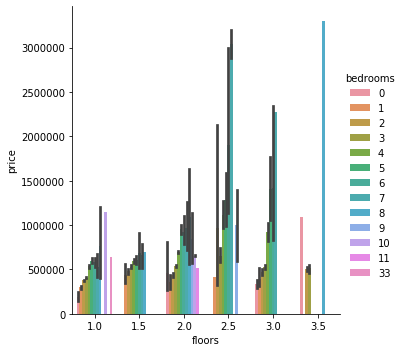

In [17]:
sb.catplot(x="floors",y="price",hue="bedrooms",kind="bar",data=hs)

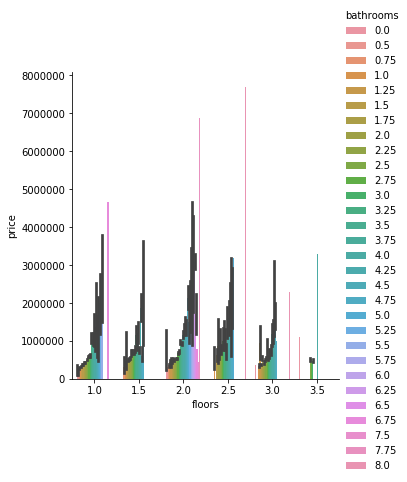

In [18]:
sb.catplot(x="floors",y="price",hue="bathrooms",kind="bar",data=hs)

# select the X_value and Y_value

In [19]:
hs.head(2)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0


In [20]:
x = hs.drop(columns="price",axis=1)
y = hs.iloc[:,0:1].values

# preprocessing the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

# split the train and test the data

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
x_train.shape

(17290, 4)

In [24]:
x_test.shape

(4323, 4)

In [25]:
y_train.shape

(17290, 1)

In [26]:
y_test.shape

(4323, 1)

# model Building with sklearn

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# train the model

In [28]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.intercept_

array([542124.89452788])

In [30]:
lm.coef_

array([[287643.32624775, -52640.97856685,   4551.98645494,
          1324.63580392]])

In [31]:
y_pred = lm.predict(x_test)

In [32]:
y_pred

array([[ 416231.10761699],
       [1325667.8077491 ],
       [ 410023.85622344],
       ...,
       [ 341164.2121141 ],
       [ 202662.35938639],
       [ 424927.69668969]])

# estimate the cost

In [33]:
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print("the rmse value is :",rmse)
print("the r_square value is :",r_square)

the rmse value is : 244892.30412806658
the r_square value is : 0.4957106510447663
